In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(3)
tf.random.set_seed(3)

In [109]:
data = pd.read_csv('../data/유방암.csv') 
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
data = data.iloc[:, 1:31]
y_obj = data.iloc[:,0]
X = data.iloc[:,1:]

In [112]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                   random_state = 1)

In [114]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [116]:
# 모델 설정
model = Sequential()
model.add(Dense(10, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.75536, saving model to ./model/01-0.7554.hdf5

Epoch 00002: val_loss improved from 0.75536 to 0.74364, saving model to ./model/02-0.7436.hdf5

Epoch 00003: val_loss improved from 0.74364 to 0.71750, saving model to ./model/03-0.7175.hdf5

Epoch 00004: val_loss improved from 0.71750 to 0.71507, saving model to ./model/04-0.7151.hdf5

Epoch 00005: val_loss improved from 0.71507 to 0.68374, saving model to ./model/05-0.6837.hdf5

Epoch 00006: val_loss improved from 0.68374 to 0.65823, saving model to ./model/06-0.6582.hdf5

Epoch 00007: val_loss improved from 0.65823 to 0.64485, saving model to ./model/07-0.6448.hdf5

Epoch 00008: val_loss improved from 0.64485 to 0.62511, saving model to ./model/08-0.6251.hdf5

Epoch 00009: val_loss improved from 0.62511 to 0.60599, saving model to ./model/09-0.6060.hdf5

Epoch 00010: val_loss improved from 0.60599 to 0.59446, saving model to ./model/10-0.5945.hdf5

Epoch 00011: val_loss improved from 0.59446

In [117]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                300       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [118]:
print('Train Accuracy : %.4f'%(model.evaluate(X_train,Y_train)[1]))
print('test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

14/14 [==============================] - 0s 714us/step - loss: 0.3520 - accuracy: 0.9108
Train Accuracy : 0.9108
5/5 [==============================] - 0s 797us/step - loss: 0.3832 - accuracy: 0.8811
test Accuracy : 0.8811


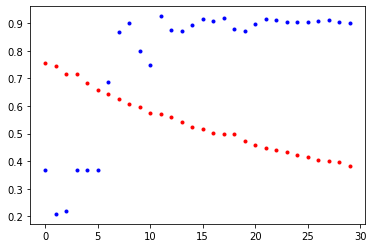

In [119]:
import matplotlib.pyplot as plt
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [141]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
a=[]
for i in range(143):
    label = Y_test[i]
    prediction = round(Y_prediction[i],0)
    a.append([label, prediction])
    print("실제유무: {:.0f}, 예상유무: {:.0f}".format(label, prediction))

실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 1, 예상유무: 1
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 0, 예상유무: 0
실제유무: 1, 예상유무: 0
실제유무: 0, 예상유무:

In [147]:
len(a)

143

In [144]:
b=0
for i,j in a:
    if i==j:
        b+=1
    else:
        b+=0

In [145]:
b

126

In [148]:
126/143

0.8811188811188811